In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('laptop_data.csv')
df.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


EDA

In [4]:
df.shape


(1303, 12)

In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   object 
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   object 
 11  Price             1303 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 122.3+ KB


In [6]:
df['Price'].describe()

count      1303.000000
mean      59870.042910
std       37243.201786
min        9270.720000
25%       31914.720000
50%       52054.560000
75%       79274.246400
max      324954.720000
Name: Price, dtype: float64

<Axes: xlabel='Price', ylabel='Count'>

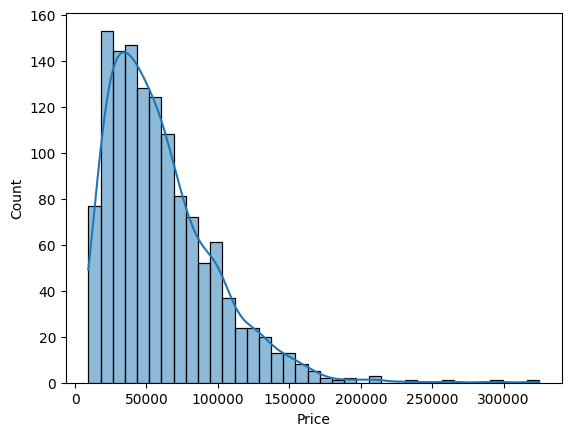

In [7]:
sns.histplot(df['Price'], kde=True)

<Axes: xlabel='log_price', ylabel='Count'>

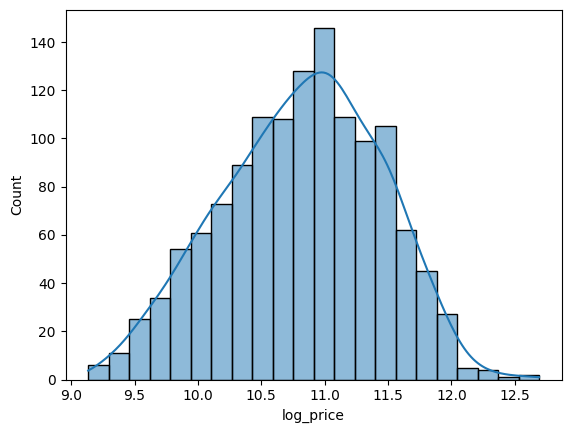

In [8]:
df['log_price'] = np.log1p(df['Price'])
sns.histplot(df['log_price'], kde=True)

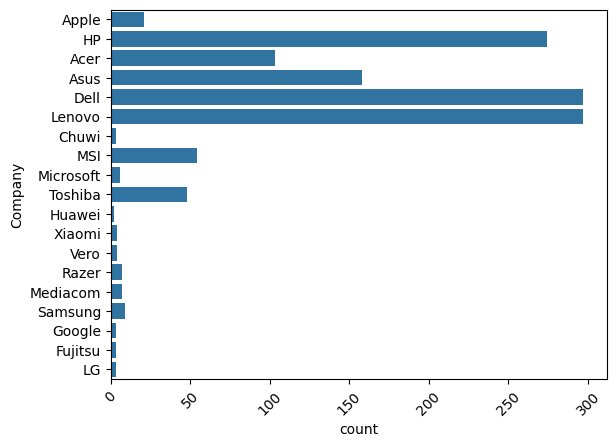

In [9]:
sns.countplot(df["Company"])
plt.xticks(rotation=45)
plt.show()

In [10]:
df['Company'].value_counts()
df.groupby('Company')['Price'].median().sort_values(ascending=False)


Company
Razer        154458.7200
LG           111834.7200
Samsung       87858.7200
MSI           85194.7200
Microsoft     83622.9600
Google        83063.5200
Huawei        75870.7200
Apple         71378.6832
Toshiba       64548.7200
Xiaomi        58578.6960
Asus          53946.0000
Dell          52480.8000
HP            51495.1200
Lenovo        47898.7200
Fujitsu       39373.9200
Acer          29783.5200
Mediacom      14119.2000
Chuwi         13261.3920
Vero          11020.9680
Name: Price, dtype: float64

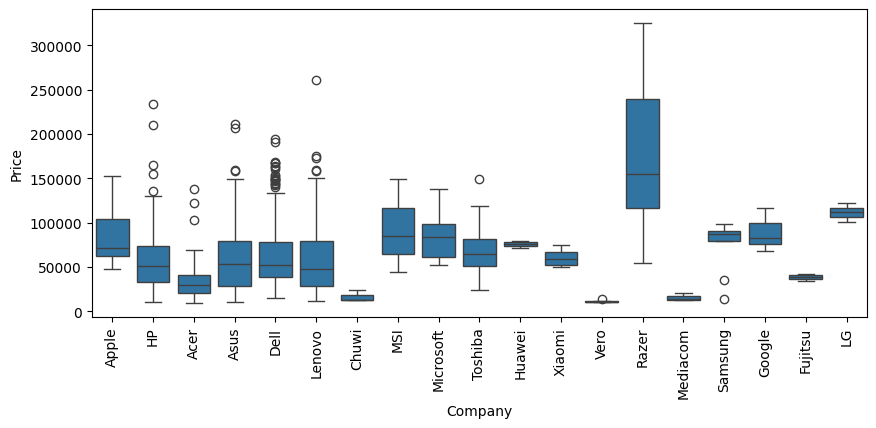

In [11]:
plt.figure(figsize=(10,4))
sns.boxplot(x='Company', y='Price', data=df)
plt.xticks(rotation=90)
plt.show()

In [12]:
df['IsRazer'] = df['Company'].apply(lambda x: 1 if x == 'Razer' else 0)

In [13]:
df['Ram'].head(10)

0     8GB
1     8GB
2     8GB
3    16GB
4     8GB
5     4GB
6    16GB
7     8GB
8    16GB
9     8GB
Name: Ram, dtype: object

In [14]:
df['Ram'].value_counts()

Ram
8GB     619
4GB     375
16GB    200
6GB      41
12GB     25
2GB      22
32GB     17
24GB      3
64GB      1
Name: count, dtype: int64

<Axes: xlabel='count', ylabel='Ram'>

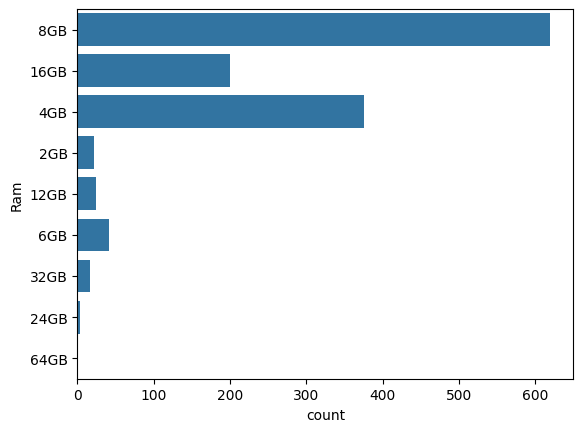

In [15]:
sns.countplot(df["Ram"])


In [16]:
df.groupby('Ram')['Price'].median().sort_index()




Ram
12GB     66546.7200
16GB    100725.8400
24GB    126912.9600
2GB      12467.5200
32GB    167691.8736
4GB      26533.4400
64GB    211788.0000
6GB      30849.1200
8GB      58554.7200
Name: Price, dtype: float64

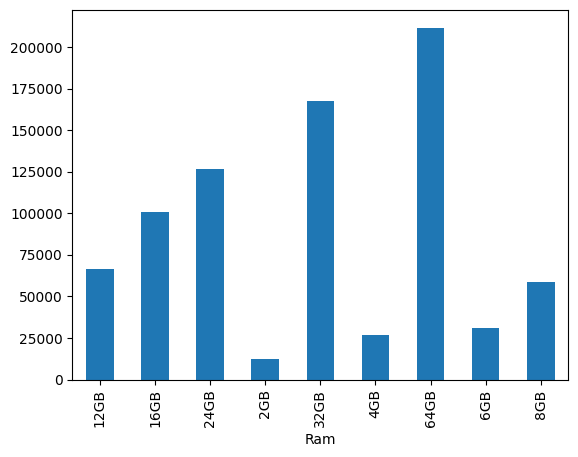

In [17]:
df.groupby('Ram')['Price'].median().plot(kind='bar')
plt.show()


In [18]:
df['RamGB'] = df['Ram'].str.replace('GB', '').astype(int)


In [19]:
df.drop(columns=['Ram'], inplace=True)

In [20]:
df['Weight'].head(10)


0    1.37kg
1    1.34kg
2    1.86kg
3    1.83kg
4    1.37kg
5     2.1kg
6    2.04kg
7    1.34kg
8     1.3kg
9     1.6kg
Name: Weight, dtype: object

In [21]:
df['Weight']=df['Weight'].str.replace('kg', '').astype(float)

In [22]:
df['Weight'].describe()


count    1303.000000
mean        2.038734
std         0.665475
min         0.690000
25%         1.500000
50%         2.040000
75%         2.300000
max         4.700000
Name: Weight, dtype: float64

/var/folders/rm/hth0y2ld5n7810rnyj1m4bm80000gn/T/ipykernel_10056/4104330275.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(pd.cut(df['Weight'], bins=6))['Price'].median().plot(kind='bar')


<Axes: xlabel='Weight'>

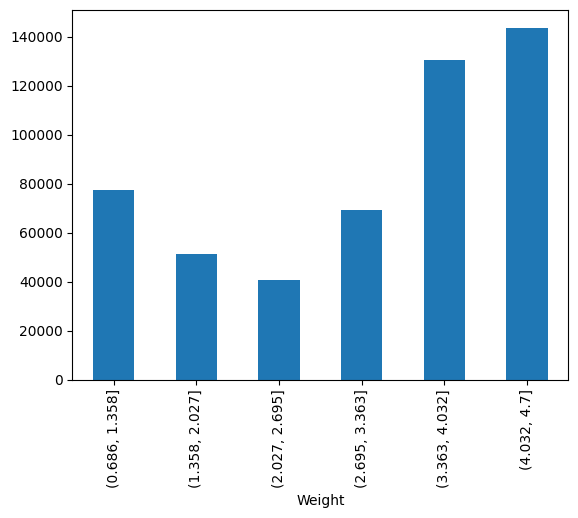

In [23]:
df.groupby(pd.cut(df['Weight'], bins=6))['Price'].median().plot(kind='bar')


In [24]:
df['Cpu'].sample(10)


752              Intel Core i5 6300HQ 2.3GHz
1021              Intel Core i5 6200U 2.3GHz
401              Intel Core i7 7700HQ 2.8GHz
1174              Intel Core i7 7500U 2.7GHz
861               Intel Core i5 7300U 2.6GHz
72                Intel Core i7 8550U 1.8GHz
5                    AMD A9-Series 9420 3GHz
859               Intel Core i3 6006U 2.0GHz
745     Intel Celeron Dual Core N3060 1.6GHz
888     Intel Celeron Dual Core N3060 1.6GHz
Name: Cpu, dtype: object

In [25]:
df['CpuBrand'] = df['Cpu'].apply(lambda x: x.split()[0])
df['CpuBrand'].value_counts()


CpuBrand
Intel      1240
AMD          62
Samsung       1
Name: count, dtype: int64

In [26]:
df[df['CpuBrand']=='AMD']['Cpu'].sample(10)

729          AMD A9-Series 9420 3GHz
298      AMD A10-Series 9600P 2.4GHz
1207        AMD E-Series 9000 2.2GHz
124          AMD A9-Series 9420 3GHz
160          AMD A9-Series 9420 3GHz
5            AMD A9-Series 9420 3GHz
1057       AMD A8-Series 7410 2.2GHz
101     AMD E-Series E2-9000e 1.5GHz
373        AMD A8-Series 7410 2.2GHz
591      AMD A12-Series 9720P 3.6GHz
Name: Cpu, dtype: object

In [27]:
def extract_cpu_tier(cpu):
    cpu = cpu.lower()

    # Intel Core
    if 'i3' in cpu:
        return 'i3'
    if 'i5' in cpu:
        return 'i5'
    if 'i7' in cpu:
        return 'i7'

    # AMD Ryzen
    if 'ryzen 3' in cpu:
        return 'ryzen3'
    if 'ryzen 5' in cpu:
        return 'ryzen5'
    if 'ryzen 7' in cpu:
        return 'ryzen7'

    # AMD A-Series
    if 'a6' in cpu:
        return 'a6'
    if 'a8' in cpu:
        return 'a8'
    if 'a9' in cpu:
        return 'a9'
    if 'a10' in cpu:
        return 'a10'
    if 'a12' in cpu:
        return 'a12'

    return 'other'


In [28]:
df['CpuTier'] = df['Cpu'].apply(extract_cpu_tier)
df['CpuTier'].value_counts()


CpuTier
i7       527
i5       423
other    171
i3       136
a9        17
a6        11
a12        8
a10        6
a8         4
Name: count, dtype: int64

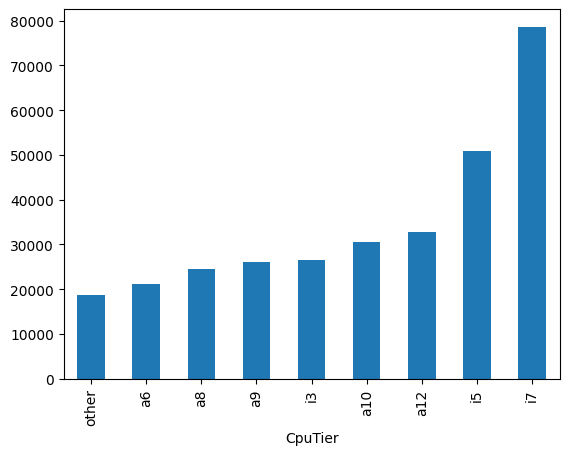

In [29]:
df.groupby('CpuTier')['Price'].median().sort_values().plot(kind='bar')
plt.show()


In [30]:
df['CpuSpeedGHz'] = (
    df['Cpu']
    .str.extract(r'([\d\.]+)\s*GHz')
    .astype(float)
)
df['CpuSpeedGHz'].describe()

count    1303.000000
mean        2.298772
std         0.506340
min         0.900000
25%         2.000000
50%         2.500000
75%         2.700000
max         3.600000
Name: CpuSpeedGHz, dtype: float64

/var/folders/rm/hth0y2ld5n7810rnyj1m4bm80000gn/T/ipykernel_10056/3401293537.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(pd.cut(df['CpuSpeedGHz'], bins=6))['Price'].median().plot(kind='bar')


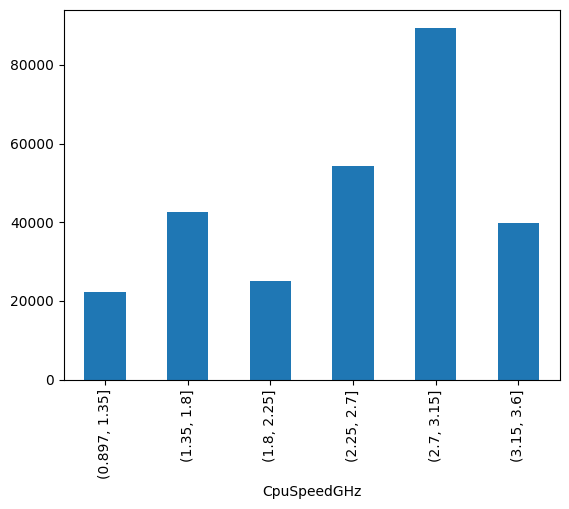

In [31]:
df.groupby(pd.cut(df['CpuSpeedGHz'], bins=6))['Price'].median().plot(kind='bar')
plt.show()


/var/folders/rm/hth0y2ld5n7810rnyj1m4bm80000gn/T/ipykernel_10056/2716725492.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(['CpuTier', pd.cut(df['CpuSpeedGHz'], bins=3)])['Price'].median().plot(kind='bar')


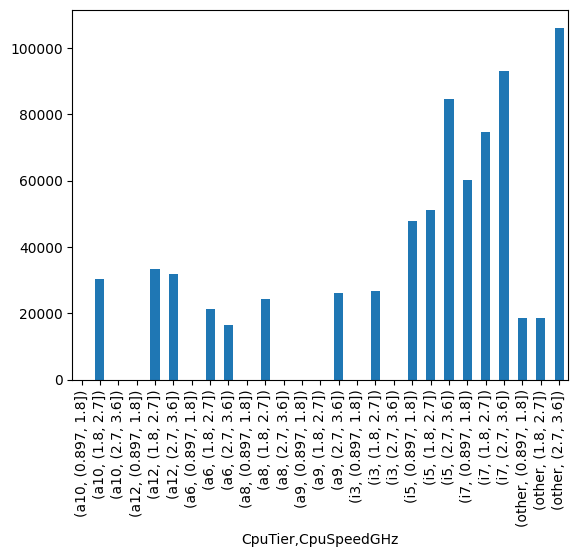

In [32]:
df.groupby(['CpuTier', pd.cut(df['CpuSpeedGHz'], bins=3)])['Price'].median().plot(kind='bar')
plt.show()


In [33]:
df[df['CpuTier'].isin(['a6','a8','a9','a10','a12'])] \
  .groupby('CpuTier')['CpuSpeedGHz'].median()


CpuTier
a10    2.5
a12    3.6
a6     2.5
a8     2.2
a9     3.0
Name: CpuSpeedGHz, dtype: float64

In [34]:
import re

In [35]:
def extract_cpu_generation(cpu):
    cpu = cpu.lower()

    # Intel Core: look for 4-digit numbers
    match = re.search(r'i[357]\s*(\d{4})', cpu)
    if match:
        return int(match.group(1)[0])  # first digit = generation

    # AMD A-Series (A9-9420 → 9)
    match = re.search(r'a(\d)', cpu)
    if match:
        return int(match.group(1))

    # AMD Ryzen (1700 → gen 1, 2700 → gen 2)
    match = re.search(r'ryzen\s*(\d)', cpu)
    if match:
        return int(match.group(1))

    return np.nan


In [36]:
# df['CpuGeneration'] = df['Cpu'].apply(extract_cpu_generation)


In [37]:
# df.groupby('CpuGeneration')['Price'].median()


CPU generation exhibits different pricing behavior across CPU families. For example, AMD A-Series processors use generation-like numbering that does not correspond to Intel Core generations. As a result, CPU generation is interpreted in conjunction with CPU tier and brand, allowing tree-based models to learn family-specific effects rather than assuming a global monotonic relationship.

In [38]:
def extract_cpu_power_class(cpu):
    cpu = cpu.upper()
    if 'HQ' in cpu or 'H ' in cpu:
        return 'HighPerformance'
    if 'U' in cpu:
        return 'LowPower'
    return 'Other'

df['CpuPowerClass'] = df['Cpu'].apply(extract_cpu_power_class)


In [39]:
df.drop(columns=['Cpu'], inplace=True)

In [40]:
df['ScreenResolution'].head(10)


0    IPS Panel Retina Display 2560x1600
1                              1440x900
2                     Full HD 1920x1080
3    IPS Panel Retina Display 2880x1800
4    IPS Panel Retina Display 2560x1600
5                              1366x768
6    IPS Panel Retina Display 2880x1800
7                              1440x900
8                     Full HD 1920x1080
9           IPS Panel Full HD 1920x1080
Name: ScreenResolution, dtype: object

In [41]:
df['Resolution'] = df['ScreenResolution'].str.extract(r'(\d+x\d+)')
df[['Width', 'Height']] = df['Resolution'].str.split('x', expand=True).astype(int)
df[['Width','Height']].describe()


,Width,Height
count,1303.000000,1303.000000
mean,1894.784344,1070.830391
std,494.641028,284.519410
min,1366.000000,768.000000
25%,1600.000000,900.000000
50%,1920.000000,1080.000000
75%,1920.000000,1080.000000
max,3840.000000,2160.000000


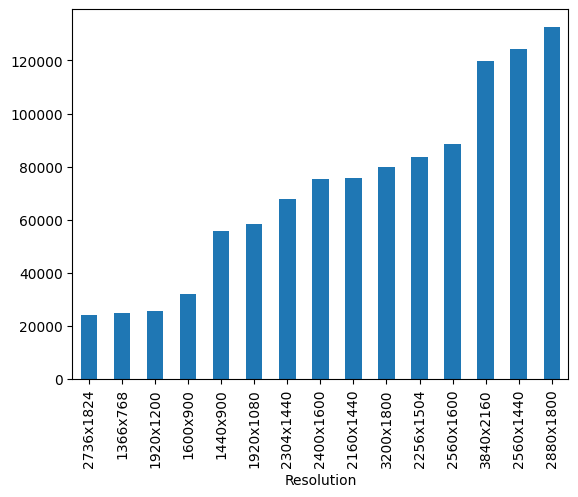

In [42]:
df.groupby('Resolution')['Price'].median().sort_values().plot(kind='bar')
plt.show()


In [43]:
df['Touchscreen'] = df['ScreenResolution'].apply(
    lambda x: 1 if 'Touchscreen' in x else 0
)


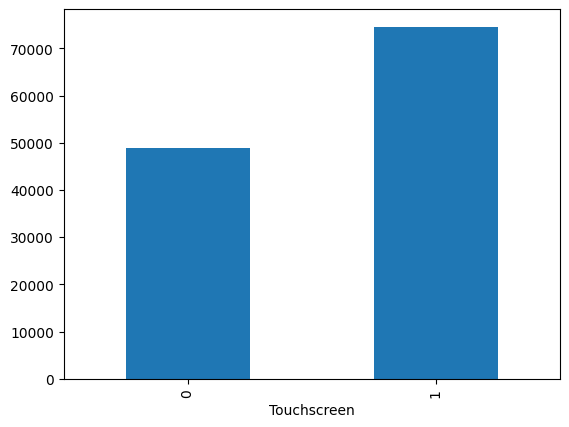

In [44]:
df.groupby('Touchscreen')['Price'].median().sort_values().plot(kind='bar')
plt.show()

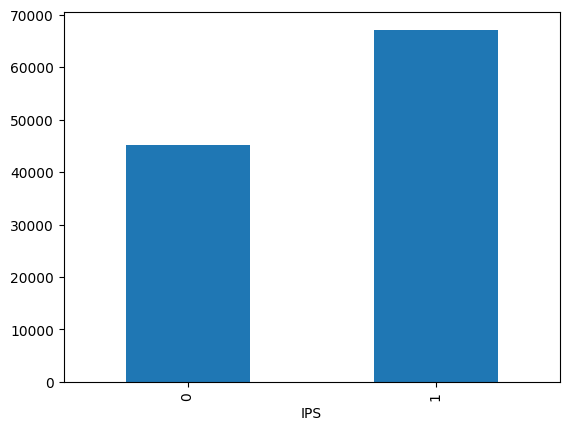

In [45]:
df['IPS'] = df['ScreenResolution'].apply(
    lambda x: 1 if 'IPS' in x else 0
)
df.groupby('IPS')['Price'].median().sort_values().plot(kind='bar')
plt.show()

In [46]:
import numpy as np

df['PPI'] = np.sqrt(df['Width']**2 + df['Height']**2) / df['Inches']
df['PPI'].describe()

count    1303.000000
mean      146.635987
std        43.121345
min        90.583402
25%       127.335675
50%       141.211998
75%       157.350512
max       352.465147
Name: PPI, dtype: float64

/var/folders/rm/hth0y2ld5n7810rnyj1m4bm80000gn/T/ipykernel_10056/136383315.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(pd.cut(df['PPI'], bins=5))['Price'].median().plot(kind='bar')


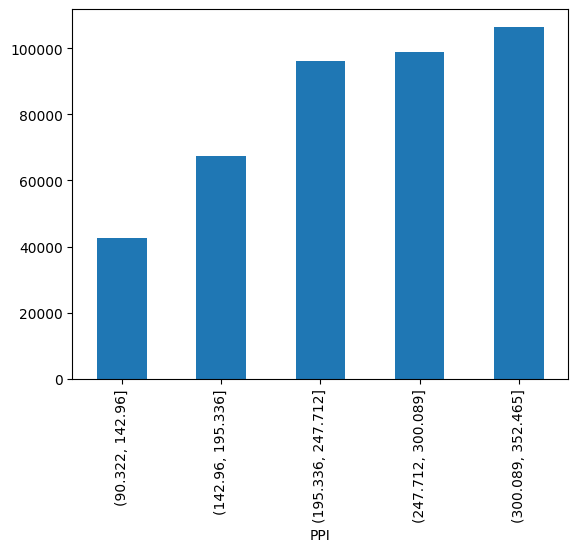

In [47]:
df.groupby(pd.cut(df['PPI'], bins=5))['Price'].median().plot(kind='bar')        
plt.show()


In [48]:
df.drop(columns=['ScreenResolution'], inplace=True)

In [49]:
df['Memory'].sample(10)


367     128GB SSD +  1TB HDD
1091                 1TB HDD
542                256GB SSD
639                  1TB SSD
4                  256GB SSD
719                256GB SSD
126                  1TB HDD
292                  1TB HDD
647                256GB SSD
275                  1TB HDD
Name: Memory, dtype: object

In [50]:
df['HasSSD'] = df['Memory'].apply(lambda x: 1 if 'SSD' in x else 0)


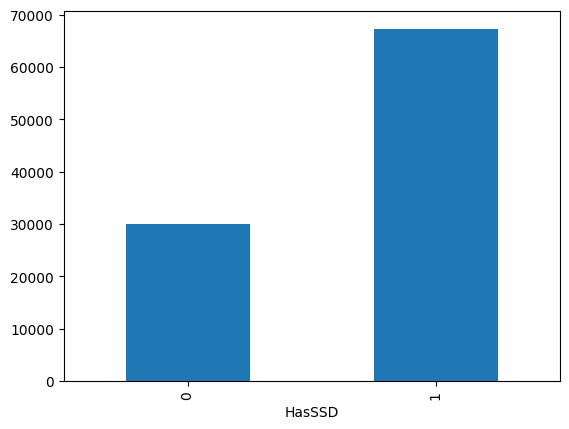

In [51]:
df.groupby('HasSSD')['Price'].median().plot(kind='bar')
plt.show()


In [52]:
df['SSD_GB'] = (
    df['Memory']
    .str.extract(r'(\d+)\s*GB SSD')
    .astype(float)
)
df['SSD_GB'] = df['SSD_GB'].fillna(0)


In [53]:
df['SSD_GB'].describe()


count    1303.000000
mean      170.471220
std       161.898402
min         0.000000
25%         0.000000
50%       128.000000
75%       256.000000
max       512.000000
Name: SSD_GB, dtype: float64

In [54]:
def extract_hdd_size(mem):
    if 'HDD' not in mem:
        return 0
    size = mem.split('HDD')[0]
    if 'TB' in size:
        return float(size.split('TB')[0].split()[-1]) * 1024
    if 'GB' in size:
        return float(size.split('GB')[0].split()[-1])
    return 0

df['HDD_GB'] = df['Memory'].apply(extract_hdd_size)
df['HDD_GB'].describe()

count    1303.000000
mean      421.316961
std       526.375448
min         0.000000
25%         0.000000
50%         0.000000
75%      1024.000000
max      2048.000000
Name: HDD_GB, dtype: float64

In [55]:
df['TotalStorage_GB'] = df['SSD_GB'] + df['HDD_GB']


/var/folders/rm/hth0y2ld5n7810rnyj1m4bm80000gn/T/ipykernel_10056/2352618298.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(pd.cut(df['TotalStorage_GB'], bins=5))['Price'].median().plot(kind='bar')


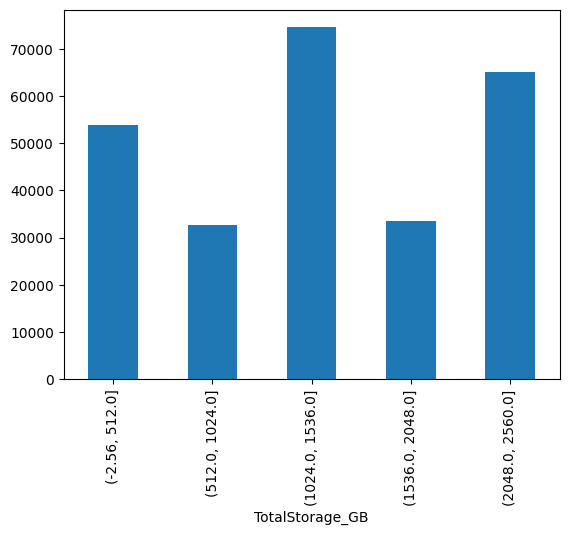

In [56]:
df.groupby(pd.cut(df['TotalStorage_GB'], bins=5))['Price'].median().plot(kind='bar')
plt.show()


In [57]:
def primary_storage(mem):
    if 'SSD' in mem and 'HDD' in mem:
        return 'Hybrid'
    if 'SSD' in mem:
        return 'SSD'
    return 'HDD'

df['StorageType'] = df['Memory'].apply(primary_storage)


In [58]:
df.groupby('StorageType')['Price'].median()


StorageType
HDD       29916.72
Hybrid    74458.80
SSD       63776.16
Name: Price, dtype: float64

The Memory column encodes both storage type and capacity. Since SSD presence introduces a significant step change in laptop pricing, it was explicitly modeled as a binary feature. SSD and HDD capacities were extracted separately, and total storage was derived as a secondary feature. This decomposition allows the model to capture both qualitative and quantitative storage effects.

In [59]:
df.drop(columns=['Memory'], inplace=True)


In [60]:
df['Gpu'].sample(10)


949       Intel HD Graphics 400
933     Intel Iris Graphics 540
200     Nvidia GeForce GTX 1060
721       Intel HD Graphics 620
1151     AMD Radeon R2 Graphics
211     Nvidia GeForce GTX 1050
757        Nvidia Quadro M1000M
416       Intel HD Graphics 520
432       Intel HD Graphics 620
862       Intel HD Graphics 620
Name: Gpu, dtype: object

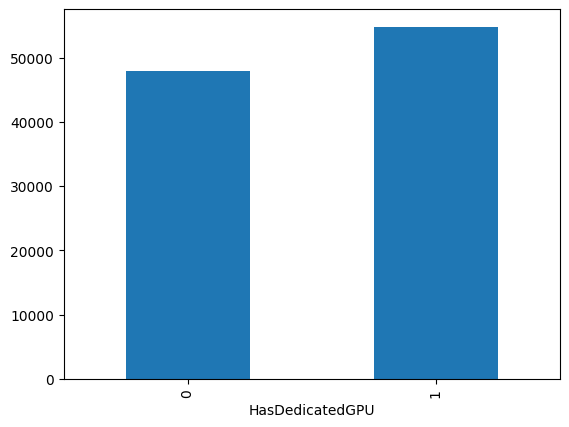

In [61]:
def is_dedicated_gpu(gpu):
    gpu = gpu.lower()
    if 'intel' in gpu:
        return 0
    return 1

df['HasDedicatedGPU'] = df['Gpu'].apply(is_dedicated_gpu)
df.groupby('HasDedicatedGPU')['Price'].median().plot(kind='bar')
plt.show()

In [62]:
df['GpuBrand'] = df['Gpu'].apply(lambda x: x.split()[0])
df['GpuBrand'].value_counts()

GpuBrand
Intel     722
Nvidia    400
AMD       180
ARM         1
Name: count, dtype: int64

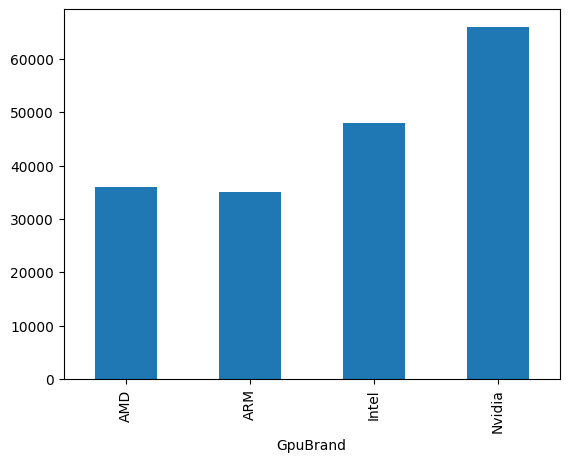

In [63]:
df.groupby('GpuBrand')['Price'].median().plot(kind='bar')
plt.show()


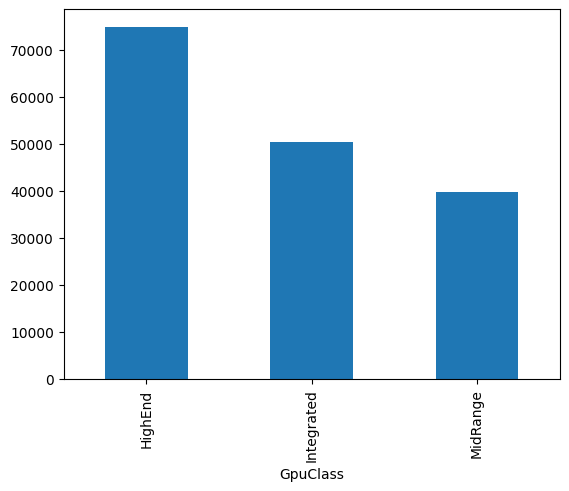

In [64]:
def gpu_class(gpu):
    gpu = gpu.lower()
    if 'gtx' in gpu or 'rtx' in gpu:
        return 'HighEnd'
    if 'mx' in gpu:
        return 'MidRange'
    if 'radeon' in gpu:
        return 'MidRange'
    return 'Integrated'

df['GpuClass'] = df['Gpu'].apply(gpu_class)
df.groupby('GpuClass')['Price'].median().plot(kind='bar')
plt.show()

In [65]:
df['OpSys'].head(10)
df['OpSys'].value_counts()


OpSys
Windows 10      1072
No OS             66
Linux             62
Windows 7         45
Chrome OS         27
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: count, dtype: int64

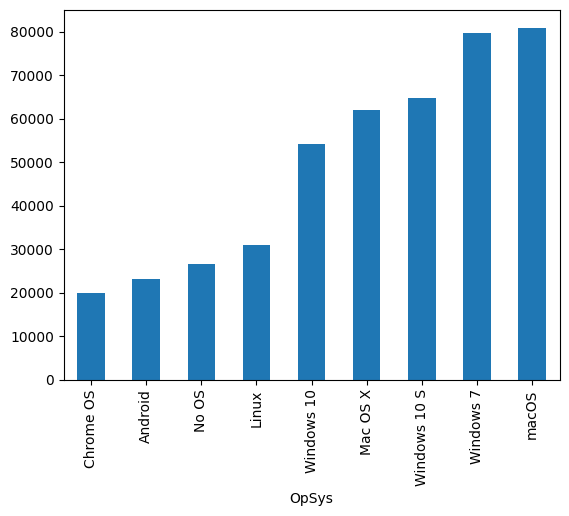

In [66]:
df.groupby('OpSys')['Price'].median().sort_values().plot(kind='bar')
plt.show()

<Axes: xlabel='OS'>

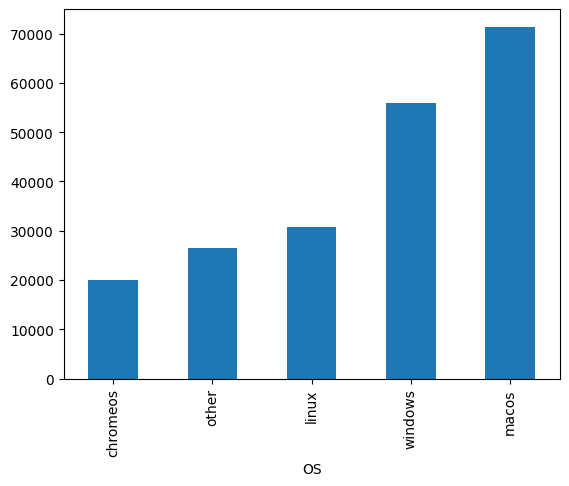

In [67]:
def normalize_os(os):
    os = os.lower()
    if 'mac' in os:
        return 'macos'
    if 'windows' in os:
        return 'windows'
    if 'linux' in os:
        return 'linux'
    if 'chrome' in os:
        return 'chromeos'
    return 'other'

df['OS'] = df['OpSys'].apply(normalize_os)
df.groupby('OS')['Price'].median().sort_values().plot(kind='bar')

In [68]:
df.drop(columns=['OpSys','Unnamed: 0'], inplace=True)


In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 28 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Company          1303 non-null   object 
 1   TypeName         1303 non-null   object 
 2   Inches           1303 non-null   float64
 3   Gpu              1303 non-null   object 
 4   Weight           1303 non-null   float64
 5   Price            1303 non-null   float64
 6   log_price        1303 non-null   float64
 7   IsRazer          1303 non-null   int64  
 8   RamGB            1303 non-null   int64  
 9   CpuBrand         1303 non-null   object 
 10  CpuTier          1303 non-null   object 
 11  CpuSpeedGHz      1303 non-null   float64
 12  CpuPowerClass    1303 non-null   object 
 13  Resolution       1303 non-null   object 
 14  Width            1303 non-null   int64  
 15  Height           1303 non-null   int64  
 16  Touchscreen      1303 non-null   int64  
 17  IPS           

PIPELINE

In [70]:
y = df['log_price']   
X = df.drop(columns=['Price', 'log_price'])


In [71]:
X.columns

Index(['Company', 'TypeName', 'Inches', 'Gpu', 'Weight', 'IsRazer', 'RamGB',
       'CpuBrand', 'CpuTier', 'CpuSpeedGHz', 'CpuPowerClass', 'Resolution',
       'Width', 'Height', 'Touchscreen', 'IPS', 'PPI', 'HasSSD', 'SSD_GB',
       'HDD_GB', 'TotalStorage_GB', 'StorageType', 'HasDedicatedGPU',
       'GpuBrand', 'GpuClass', 'OS'],
      dtype='object')

In [72]:
df.drop(columns=['Gpu','Resolution'], inplace=True)

In [73]:
df['Height'].head(10)

0    1600
1     900
2    1080
3    1800
4    1600
5     768
6    1800
7     900
8    1080
9    1080
Name: Height, dtype: int64

In [74]:
num_features = [
    'RamGB',
    'Weight',
    'CpuSpeedGHz',
    
    'PPI',
    'SSD_GB',
    'HDD_GB',
    'Height',
    'TotalStorage_GB',
    'Inches'
]
bin_features = [
    'Touchscreen',
    'IPS',
    'HasSSD',
    'HasDedicatedGPU',
    'IsRazer'  
]
cat_features = [
    'Company',
    'CpuTier',
    'CpuPowerClass',
    'GpuBrand',
    'GpuClass',
    'StorageType',
    'OS',
    'TypeName',
    'CpuBrand'
]

In [75]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline


In [76]:
num_pipeline = Pipeline(steps=[
    ('scaler', StandardScaler())
])


In [77]:
cat_pipeline = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])


In [78]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_pipeline, num_features),
        ('bin', 'passthrough', bin_features),
        ('cat', cat_pipeline, cat_features)
    ]
)


In [79]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [80]:
from sklearn.linear_model import LinearRegression

linreg_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', LinearRegression())
])


In [81]:
linreg_model.fit(X_train, y_train)


,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('preprocessor', ...), ('model', ...)]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"transformers transformers: list of tuplesList of (name, transformer, columns) tuples specifying thetransformer objects to be applied to subsets of the data.name : str Like in Pipeline and FeatureUnion, this allows the transformer and its parameters to be set using ``set_params`` and searched in grid search.transformer : {'drop', 'passthrough'} or estimator Estimator must support :term:`fit` and :term:`transform`. Special-cased strings 'drop' and 'passthrough' are accepted as well, to indicate to drop the columns or to pass them through untransformed, respectively.columns : str, array-like of str, int, array-like of int, array-like of bool, slice or callable Indexes the data on its second axis. Integers are interpreted as positional columns, while strings can reference DataFrame columns by name. A scalar string or int should be used where ``transformer`` expects X to be a 1d array-like (vector), otherwise a 2d array will be passed to the transformer. A callable is passed the input data `X` and can return any of the above. To select multiple columns by name or dtype, you can use :obj:`make_column_selector`.","[('num', ...), ('bin', ...), ...]"
,"remainder remainder: {'drop', 'passthrough'} or estimator, default='drop'By default, only the specified columns in `transformers` aretransformed and combined in the output, and the non-specifiedcolumns are dropped. (default of ``'drop'``).By specifying ``remainder='passthrough'``, all remaining columns thatwere not specified in `transformers`, but present in the data passedto `fit` will be automatically passed through. This subset of columnsis concatenated with the output of the transformers. For dataframes,extra columns not seen during `fit` will be excluded from the outputof `transform`.By setting ``remainder`` to be an estimator, the remainingnon-specified columns will use the ``remainder`` estimator. Theestimator must support :term:`fit` and :term:`transform`.Note that using this feature requires that the DataFrame columnsinput at :term:`fit` and :term:`transform` have identical order.",'drop'
,"sparse_threshold sparse_threshold: float, default=0.3If the output of the different transforme

In [82]:
from sklearn.metrics import mean_squared_error
import numpy as np

y_pred = linreg_model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
rmse


np.float64(0.23292033250707295)

In [83]:
np.expm1(y_pred[:5])
np.expm1(y_test[:5])


479     89084.16
1022    61218.72
298     26586.72
1265    47898.72
774     66280.32
Name: log_price, dtype: float64

In [84]:
np.isnan(y_pred).sum()


np.int64(0)

In [85]:
from sklearn.ensemble import RandomForestRegressor

rf_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', RandomForestRegressor(
        n_estimators=300,
        random_state=42,
        n_jobs=-1
    ))
])
rf_model.fit(X_train, y_train)

,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('preprocessor', ...), ('model', ...)]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"transformers transformers: list of tuplesList of (name, transformer, columns) tuples specifying thetransformer objects to be applied to subsets of the data.name : str Like in Pipeline and FeatureUnion, this allows the transformer and its parameters to be set using ``set_params`` and searched in grid search.transformer : {'drop', 'passthrough'} or estimator Estimator must support :term:`fit` and :term:`transform`. Special-cased strings 'drop' and 'passthrough' are accepted as well, to indicate to drop the columns or to pass them through untransformed, respectively.columns : str, array-like of str, int, array-like of int, array-like of bool, slice or callable Indexes the data on its second axis. Integers are interpreted as positional columns, while strings can reference DataFrame columns by name. A scalar string or int should be used where ``transformer`` expects X to be a 1d array-like (vector), otherwise a 2d array will be passed to the transformer. A callable is passed the input data `X` and can return any of the above. To select multiple columns by name or dtype, you can use :obj:`make_column_selector`.","[('num', ...), ('bin', ...), ...]"
,"remainder remainder: {'drop', 'passthrough'} or estimator, default='drop'By default, only the specified columns in `transformers` aretransformed and combined in the output, and the non-specifiedcolumns are dropped. (default of ``'drop'``).By specifying ``remainder='passthrough'``, all remaining columns thatwere not specified in `transformers`, but present in the data passedto `fit` will be automatically passed through. This subset of columnsis concatenated with the output of the transformers. For dataframes,extra columns not seen during `fit` will be excluded from the outputof `transform`.By setting ``remainder`` to be an estimator, the remainingnon-specified columns will use the ``remainder`` estimator. Theestimator must support :term:`fit` and :term:`transform`.Note that using this feature requires that the DataFrame columnsinput at :term:`fit` and :term:`transform` have identical order.",'drop'
,"sparse_threshold sparse_threshold: float, default=0.3If the output of the different transforme

In [86]:
y_pred_rf = rf_model.predict(X_test)
rf_rmse = np.sqrt(mean_squared_error(y_test, y_pred_rf))
rf_rmse


np.float64(0.21544969703826736)

In [87]:
from sklearn.ensemble import GradientBoostingRegressor

gbr_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', GradientBoostingRegressor(
        n_estimators=300,
        learning_rate=0.05,
        max_depth=3,
        random_state=42
    ))
])
gbr_model.fit(X_train, y_train)

,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('preprocessor', ...), ('model', ...)]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"transformers transformers: list of tuplesList of (name, transformer, columns) tuples specifying thetransformer objects to be applied to subsets of the data.name : str Like in Pipeline and FeatureUnion, this allows the transformer and its parameters to be set using ``set_params`` and searched in grid search.transformer : {'drop', 'passthrough'} or estimator Estimator must support :term:`fit` and :term:`transform`. Special-cased strings 'drop' and 'passthrough' are accepted as well, to indicate to drop the columns or to pass them through untransformed, respectively.columns : str, array-like of str, int, array-like of int, array-like of bool, slice or callable Indexes the data on its second axis. Integers are interpreted as positional columns, while strings can reference DataFrame columns by name. A scalar string or int should be used where ``transformer`` expects X to be a 1d array-like (vector), otherwise a 2d array will be passed to the transformer. A callable is passed the input data `X` and can return any of the above. To select multiple columns by name or dtype, you can use :obj:`make_column_selector`.","[('num', ...), ('bin', ...), ...]"
,"remainder remainder: {'drop', 'passthrough'} or estimator, default='drop'By default, only the specified columns in `transformers` aretransformed and combined in the output, and the non-specifiedcolumns are dropped. (default of ``'drop'``).By specifying ``remainder='passthrough'``, all remaining columns thatwere not specified in `transformers`, but present in the data passedto `fit` will be automatically passed through. This subset of columnsis concatenated with the output of the transformers. For dataframes,extra columns not seen during `fit` will be excluded from the outputof `transform`.By setting ``remainder`` to be an estimator, the remainingnon-specified columns will use the ``remainder`` estimator. Theestimator must support :term:`fit` and :term:`transform`.Note that using this feature requires that the DataFrame columnsinput at :term:`fit` and :term:`transform` have identical order.",'drop'
,"sparse_threshold sparse_threshold: float, default=0.3If the output of the different transforme

In [88]:
y_pred_gbr = gbr_model.predict(X_test)
gbr_rmse = np.sqrt(mean_squared_error(y_test, y_pred_gbr))
gbr_rmse


np.float64(0.2094369253550166)

In [89]:
import numpy as np
import pandas as pd

# Use your best model so far (GBR or RF)
y_test_real = np.expm1(y_test)
y_pred_real = np.expm1(y_pred_gbr)  # or y_pred_rf

error_df = X_test.copy()
error_df['ActualPrice'] = y_test_real.values
error_df['PredictedPrice'] = y_pred_real
error_df['AbsoluteError'] = error_df['PredictedPrice'] - error_df['ActualPrice']
error_df['PercentError'] = error_df['AbsoluteError'] / error_df['ActualPrice']


In [90]:
error_df.sort_values('PercentError', ascending=False).head(10)

,Company,TypeName,Inches,Gpu,Weight,IsRazer,RamGB,CpuBrand,CpuTier,CpuSpeedGHz,...,TotalStorage_GB,StorageType,HasDedicatedGPU,GpuBrand,GpuClass,OS,ActualPrice,PredictedPrice,AbsoluteError,PercentError
901,Asus,Gaming,17.3,Nvidia GeForce GTX 980M,3.58,0,32,Intel,i7,2.7,...,256.0,SSD,1,Nvidia,HighEnd,windows,68145.1200,186632.501634,118487.381634,1.738751
494,Asus,Gaming,17.3,Nvidia GeForce GTX 965M,4.33,0,24,Intel,i7,2.6,...,1280.0,Hybrid,1,Nvidia,HighEnd,windows,67612.3200,150299.108583,82686.788583,1.222954
677,HP,2 in 1 Convertible,11.6,Intel HD Graphics 500,1.40,0,8,Intel,other,1.1,...,0.0,HDD,0,Intel,Integrated,chromeos,26373.6000,49829.087638,23455.487638,0.889355
429,Mediacom,2 in 1 Convertible,11.6,Intel HD Graphics 500,1.16,0,4,Intel,other,1.1,...,32.0,SSD,0,Intel,Integrated,windows,15930.7200,29902.003911,13971.283911,0.877003
86,HP,Ultrabook,15.6,Nvidia GeForce GTX 940MX,1.83,0,8,Intel,i7,1.8,...,256.0,SSD,1,Nvidia,HighEnd,windows,37242.7200,65929.072031,28686.352031,0.770254
297,Dell,Workstation,17.3,Nvidia Quadro M1200,3.42,0,16,Intel,i7,2.9,...,256.0,SSD,1,Nvidia,Integrated,windows,153705.3408,259869.997304,106164.656504,0.690702
163,Lenovo,Gaming,15.6,Nvidia GeForce GTX 1050 Ti,2.50,0,16,Intel,i7,2.8,...,256.0,SSD,1,Nvidia,HighEnd,windows,57489.1200,90426.622751,32937.502751,0.572935
1067,Dell,2 in 1 Convertible,13.3,Intel HD Graphics 520,1.62,0,8,Intel,i7,2.5,...,256.0,SSD,0,Intel,Integrated,windows,42517.9728,66225.963433,23707.990633,0.557599
244,Lenovo,2 in 1 Convertible,13.9,Intel HD Graphics 620,1.38,0,8,Intel,i7,2.7,...,256.0,SSD,0,Intel,Integrated,windows,57489.1200,86120.926827,28631.806827,0.498039
701,Lenovo,Notebook,15.6,AMD Radeon 530,2.20,0,4,AMD,a9,2.9,...,256.0,SSD,1,AMD,MidRange,windows,21258.7200,31042.234626,9783.514626,0.460212


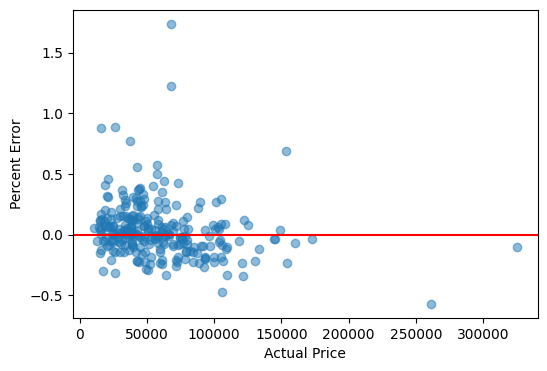

In [91]:
plt.figure(figsize=(6,4))
plt.scatter(error_df['ActualPrice'], error_df['PercentError'], alpha=0.5)
plt.axhline(0, color='red')
plt.xlabel('Actual Price')
plt.ylabel('Percent Error')
plt.show()


In [92]:
error_df.groupby('Company')['PercentError'].median().sort_values()


Company
Xiaomi      -0.173197
Toshiba     -0.143547
Razer       -0.099756
MSI         -0.014413
HP          -0.014290
Apple       -0.000008
Lenovo       0.007782
Fujitsu      0.025020
Dell         0.028925
Acer         0.039903
Asus         0.040089
Mediacom     0.065749
Huawei       0.069663
Samsung      0.084902
Microsoft    0.141918
Name: PercentError, dtype: float64

In [93]:
from xgboost import XGBRegressor

xgb_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', XGBRegressor(
        n_estimators=400,
        learning_rate=0.05,
        max_depth=4,
        subsample=0.8,
        colsample_bytree=0.8,
        reg_alpha=0.1,        # L1 regularization
        reg_lambda=1.0,       # L2 regularization
        objective='reg:squarederror',
        random_state=42,
        n_jobs=-1
    ))
])
xgb_model.fit(X_train, y_train)

,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('preprocessor', ...), ('model', ...)]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"transformers transformers: list of tuplesList of (name, transformer, columns) tuples specifying thetransformer objects to be applied to subsets of the data.name : str Like in Pipeline and FeatureUnion, this allows the transformer and its parameters to be set using ``set_params`` and searched in grid search.transformer : {'drop', 'passthrough'} or estimator Estimator must support :term:`fit` and :term:`transform`. Special-cased strings 'drop' and 'passthrough' are accepted as well, to indicate to drop the columns or to pass them through untransformed, respectively.columns : str, array-like of str, int, array-like of int, array-like of bool, slice or callable Indexes the data on its second axis. Integers are interpreted as positional columns, while strings can reference DataFrame columns by name. A scalar string or int should be used where ``transformer`` expects X to be a 1d array-like (vector), otherwise a 2d array will be passed to the transformer. A callable is passed the input data `X` and can return any of the above. To select multiple columns by name or dtype, you can use :obj:`make_column_selector`.","[('num', ...), ('bin', ...), ...]"
,"remainder remainder: {'drop', 'passthrough'} or estimator, default='drop'By default, only the specified columns in `transformers` aretransformed and combined in the output, and the non-specifiedcolumns are dropped. (default of ``'drop'``).By specifying ``remainder='passthrough'``, all remaining columns thatwere not specified in `transformers`, but present in the data passedto `fit` will be automatically passed through. This subset of columnsis concatenated with the output of the transformers. For dataframes,extra columns not seen during `fit` will be excluded from the outputof `transform`.By setting ``remainder`` to be an estimator, the remainingnon-specified columns will use the ``remainder`` estimator. Theestimator must support :term:`fit` and :term:`transform`.Note that using this feature requires that the DataFrame columnsinput at :term:`fit` and :term:`transform` have identical order.",'drop'
,"sparse_threshold sparse_threshold: float, default=0.3If the output of the different transforme

In [94]:
y_pred_xgb = xgb_model.predict(X_test)
xgb_rmse = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
xgb_rmse


np.float64(0.19174360174966912)

In [95]:
import pickle

with open("laptop_price_xgb_model.pkl", "wb") as f:
    pickle.dump(xgb_model, f)


In [96]:
with open("laptop_price_xgb_model.pkl", "rb") as f:
    loaded_model = pickle.load(f)

loaded_model.predict(X_test.iloc[[0]])


array([11.166004], dtype=float32)